# TSAI EVA 8 - Phase 1
## Assignment 3 - Back-propagation and Architectural Basics [Part 2]

## 0.Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np

## 1. EDA

Downloading MNIST dataset and creating dataloader for EDA

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

labels: tensor([9, 1, 7, 8, 3, 1, 7, 6, 1, 1, 1, 0, 5, 9, 8, 9, 2, 5, 2, 0, 2, 1, 6, 1,
        4, 7, 7, 2, 5, 9, 8, 8, 0, 2, 0, 1, 4, 8, 2, 2, 1, 0, 9, 2, 9, 8, 6, 3,
        8, 7, 9, 0, 1, 9, 3, 5, 6, 8, 7, 5, 6, 2, 7, 6, 4, 5, 5, 4, 7, 8, 3, 5,
        3, 6, 8, 3, 4, 0, 2, 9, 5, 2, 2, 6, 4, 8, 3, 1, 0, 2, 7, 5, 2, 3, 3, 0,
        5, 7, 1, 5, 1, 1, 3, 9, 2, 3, 6, 3, 2, 9, 8, 2, 4, 1, 4, 3, 3, 2, 8, 8,
        4, 0, 1, 1, 3, 2, 1, 2])


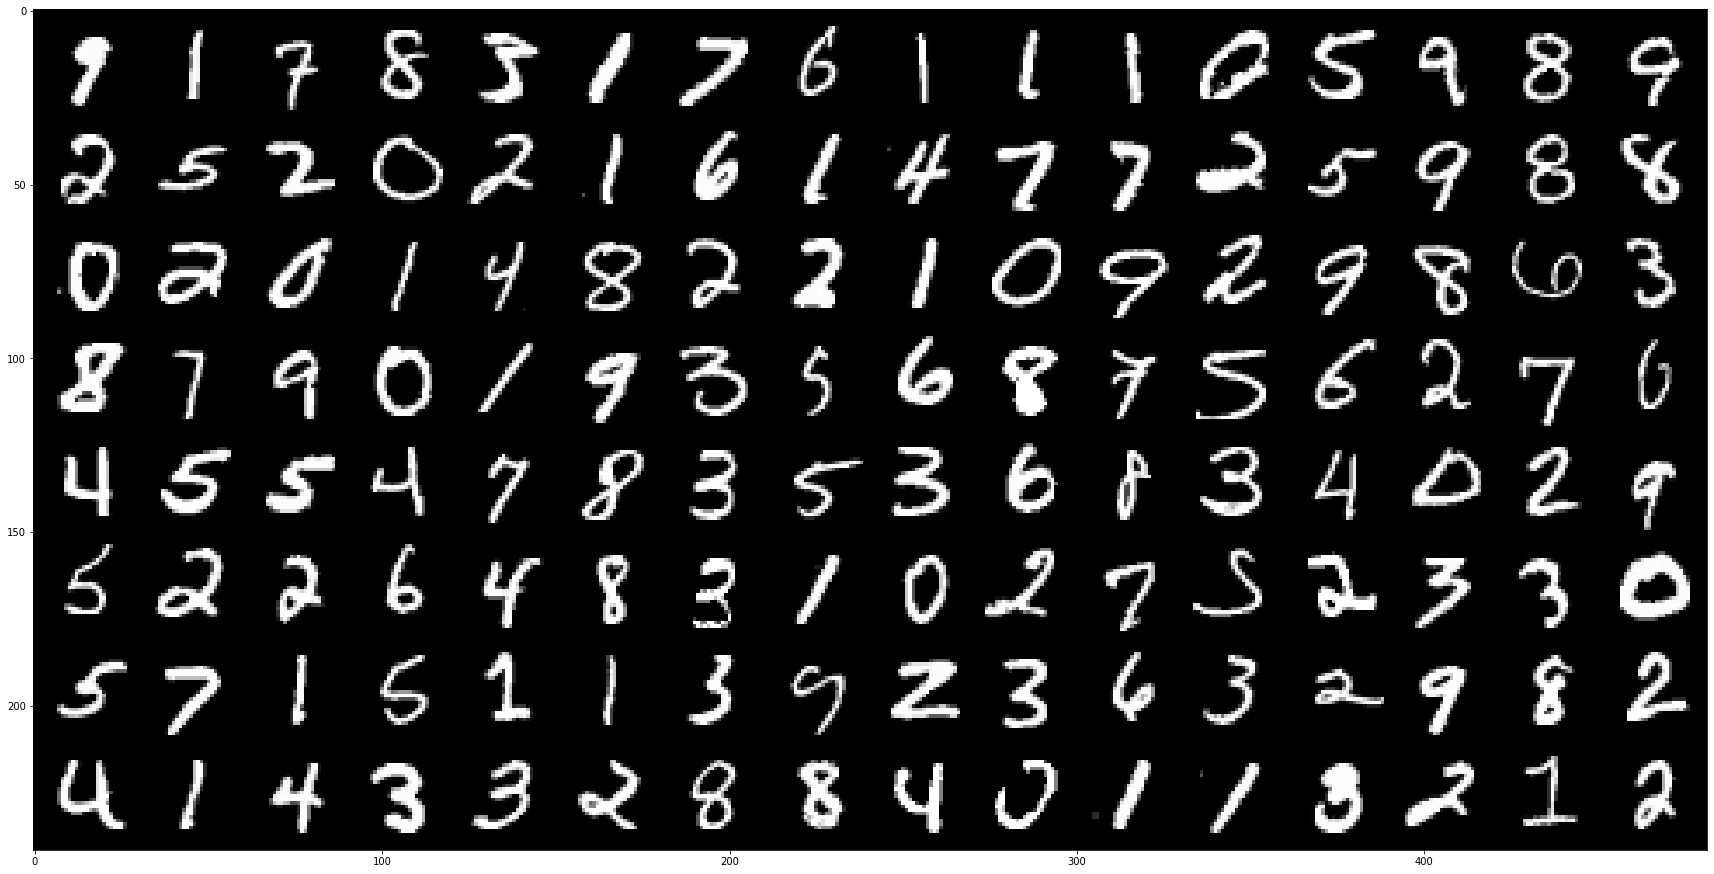

In [2]:
train_loader = torch.utils.data.DataLoader(
  dataset=torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
      transforms.ToTensor()
    ])
  ),
  batch_size=128,
  shuffle=True
)

batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=16)
plt.figure(figsize=(30, 30))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels:', labels)


## 2. Model Training & Testing

In [3]:
%%bash

cd /content/

# Delete in directory exists
if [ -d working ]; then
    rm -rf working
fi

MOVE_TO_BRANCH='main'

# create a working folder
mkdir -p /content/working

# move to working folder
cd /content/working

git clone https://github.com/ankithaldar/tsai_eva8_assignments.git

# get into kaggle git repo
cd ./tsai_eva8_assignments

# more to another branch
# git checkout -b $MOVE_TO_BRANCH refs/remotes/origin/$MOVE_TO_BRANCH

Cloning into 'tsai_eva8_assignments'...


In [4]:
%%bash
pip install -r /content/working/tsai_eva8_assignments/eva8_phase01/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.7/444.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 17.2 MB/s eta

In [5]:
%cd /content/working/tsai_eva8_assignments/eva8_phase01/src/
%load_ext autoreload
%autoreload 2

/content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src


In [6]:
!python train.py --params_yml "./config_params/test_model_3a.yml"

loading model parameters...
model parameters loaded...
100% 9912422/9912422 [00:00<00:00, 247902398.45it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw

100% 28881/28881 [00:00<00:00, 162162910.07it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw

100% 1648877/1648877 [00:00<00:00, 223974719.76it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw

100% 4542/4542 [00:00<00:00, 33363447.93it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/assignment_2_5/src/data/MNIST/raw/t10k-l